In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [2]:
regression_columns = ['1B', '2B', '3B', 'HR', 'HBP+BB', 'SB', 'CS']
regression_2_columns = ['SLG', 'OBP']
target = 'R'

In [3]:
def obp_plus_slg(df):
    df['OBP+SLG'] = df['OBP'] + df['SLG']
    return df

In [4]:
transformers = [
    obp_plus_slg,
]

df = pd.read_csv('../../data/mlb/batting/season_aggregates.csv', index_col=None)
df.season = df.season.astype(str)

for transformer in transformers:
    df = transformer(df)

df = df.loc[df.season.isin(['2021', '2022'])]

In [5]:
print(df.season.unique())

df.head()

['2021' '2022']


,season,team,#Bat,BatAge,R/G,G,PA,AB,R,H,...,GDP,HBP,SH,SF,IBB,LOB,1B,HBP+BB,OBP+SLG,team_name
30,2021,1,64,29.2,4.46,162,6019,5437,723,1331,...,107,59,30,25,35,1029,853,523,0.717,Los Angeles Angels
31,2021,2,64,28.9,4.19,162,6144,5489,679,1297,...,99,54,32,28,24,1152,814,591,0.691,Arizona Diamondbacks
32,2021,3,56,28.2,4.91,161,6056,5363,790,1307,...,81,67,32,43,36,1072,779,616,0.754,Atlanta Braves
33,2021,4,62,26.7,4.07,162,5983,5420,659,1296,...,105,65,14,31,12,1046,820,516,0.706,Baltimore Orioles
34,2021,5,56,28.0,5.12,162,6122,5495,829,1434,...,100,61,10,42,22,1093,862,573,0.777,Boston Red Sox


In [6]:
for season in df.season.unique():
    print(season)
    display(df.loc[df.season == season, regression_columns].describe())


2021


,1B,2B,3B,HR,HBP+BB,SB,CS
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,833.533333,262.100000,22.366667,198.133333,596.866667,73.766667,23.700000
std,44.451239,27.204652,7.122007,30.471845,63.666011,22.573532,7.096138
min,766.000000,213.000000,11.000000,124.000000,476.000000,36.000000,14.000000
25%,798.000000,241.750000,18.000000,180.500000,547.500000,56.250000,19.000000
50%,822.000000,265.500000,22.000000,198.000000,594.500000,71.000000,22.500000
75%,851.500000,274.500000,24.750000,221.750000,654.500000,88.000000,26.000000
max,962.000000,330.000000,37.000000,262.000000,717.000000,124.000000,42.000000


2022


,1B,2B,3B,HR,HBP+BB,SB,CS
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,862.566667,264.666667,21.433333,173.833333,563.300000,82.866667,27.033333
std,64.754541,31.316332,7.938050,34.873252,67.125282,24.597075,7.107467
min,746.000000,219.000000,8.000000,110.000000,438.000000,38.000000,10.000000
25%,822.000000,247.250000,17.000000,149.000000,509.500000,62.500000,22.000000
50%,852.500000,263.500000,20.000000,171.000000,549.500000,85.000000,27.500000
75%,903.750000,278.750000,28.500000,197.750000,610.500000,101.000000,31.750000
max,1005.000000,352.000000,38.000000,254.000000,690.000000,128.000000,41.000000


<AxesSubplot: xlabel='HR', ylabel='Count'>

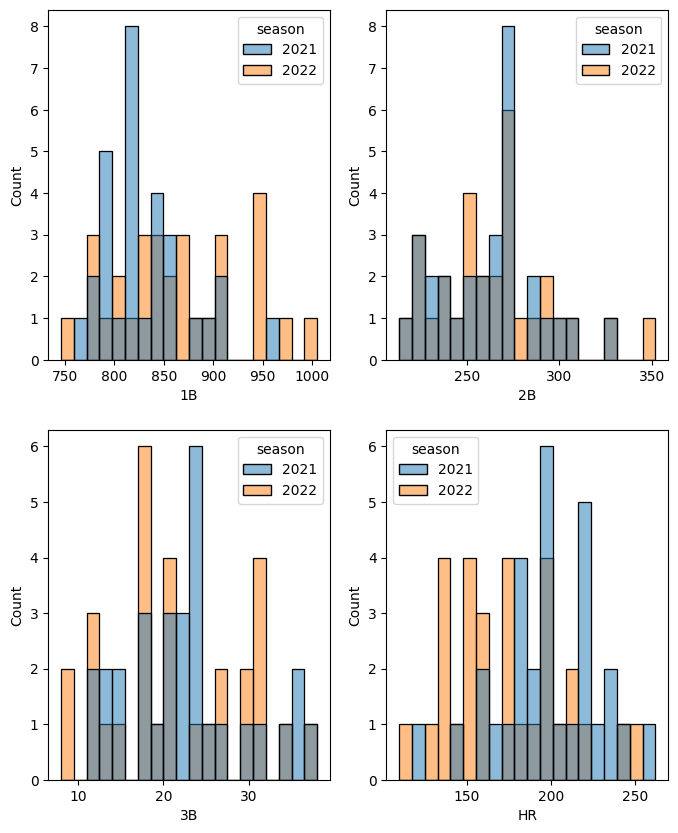

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(8, 10))

sns.histplot(ax=axes[0, 0], data=df, x='1B', hue='season', bins=20)
sns.histplot(ax=axes[0, 1], data=df, x='2B', hue='season', bins=20)
sns.histplot(ax=axes[1, 0], data=df, x='3B', hue='season', bins=20)
sns.histplot(ax=axes[1, 1], data=df, x='HR', hue='season', bins=20)

In [8]:
corr = df[[target] + regression_columns].corr()
corr

,R,1B,2B,3B,HR,HBP+BB,SB,CS
R,1.000000,0.108313,0.545314,-0.174907,0.782613,0.605161,-0.138213,-0.248549
1B,0.108313,1.000000,0.318812,0.047699,-0.287154,-0.315436,-0.124677,-0.080625
2B,0.545314,0.318812,1.000000,-0.108932,0.121908,0.128249,-0.293802,-0.255625
3B,-0.174907,0.047699,-0.108932,1.000000,-0.357461,-0.180243,0.233613,0.218827
HR,0.782613,-0.287154,0.121908,-0.357461,1.000000,0.547064,-0.045043,-0.183756
HBP+BB,0.605161,-0.315436,0.128249,-0.180243,0.547064,1.000000,-0.203806,-0.185738
SB,-0.138213,-0.124677,-0.293802,0.233613,-0.045043,-0.203806,1.000000,0.566592
CS,-0.248549,-0.080625,-0.255625,0.218827,-0.183756,-0.185738,0.566592,1.000000


<AxesSubplot: >

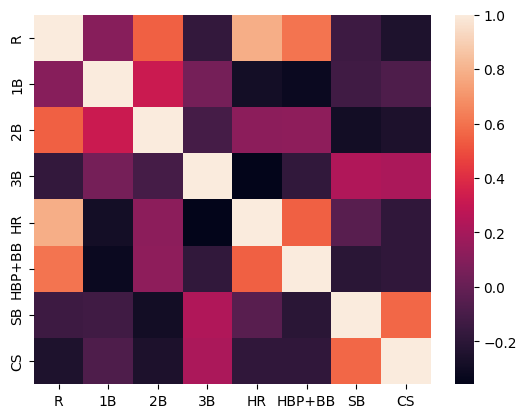

In [9]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [10]:
def setup_model(df, columns):
    y = df[target]
    X = sm.add_constant(df.loc[:, columns])

    return X, y

X, y = setup_model(df, regression_columns)

est = sm.OLS(y, X)
est = est.fit()

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     106.4
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.58e-28
Time:                        10:22:12   Log-Likelihood:                -260.42
No. Observations:                  60   AIC:                             536.8
Df Residuals:                      52   BIC:                             553.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -357.5865     61.240     -5.839      0.0

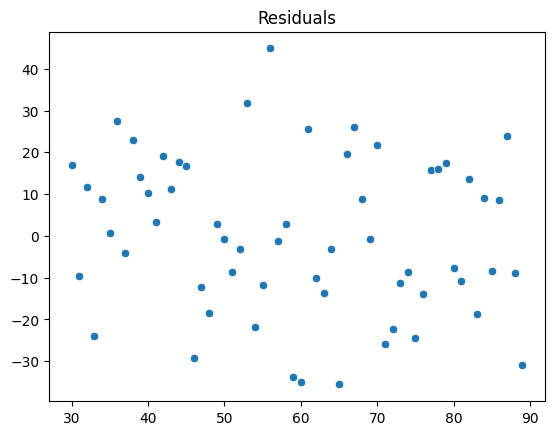

In [11]:
def print_summary(est, columns):
    print(est.summary())
    print()
    print('p-values')
    for i, column in enumerate(columns):
        print({column: (est.pvalues[i], est.pvalues[i] < .05)})

    ## pattern == hetroscedastic (no constant var), fan-out == homoscedastic (constant var)
    sns.scatterplot(data=est.resid).set(title='Residuals')

print_summary(est, X.columns)

In [12]:
df_pred = df.loc[:, ['team', 'R']]

df_pred['PRED_R'] = est.predict(X)
df_pred['ABS_DIFF'] = (df_pred.R - df_pred.PRED_R).abs()

df_pred.head()

,team,R,PRED_R,ABS_DIFF
30,1,723,705.945866,17.054134
31,2,679,688.713207,9.713207
32,3,790,778.302548,11.697452
33,4,659,683.092601,24.092601
34,5,829,820.085221,8.914779


In [13]:
print('off by an average of:', df_pred.ABS_DIFF.mean(), 'runs')

off by an average of: 15.648752733079606 runs


### SLG / OBP contributions vs runs

<AxesSubplot: title={'center': 'OBP'}, xlabel='OBP', ylabel='Count'>

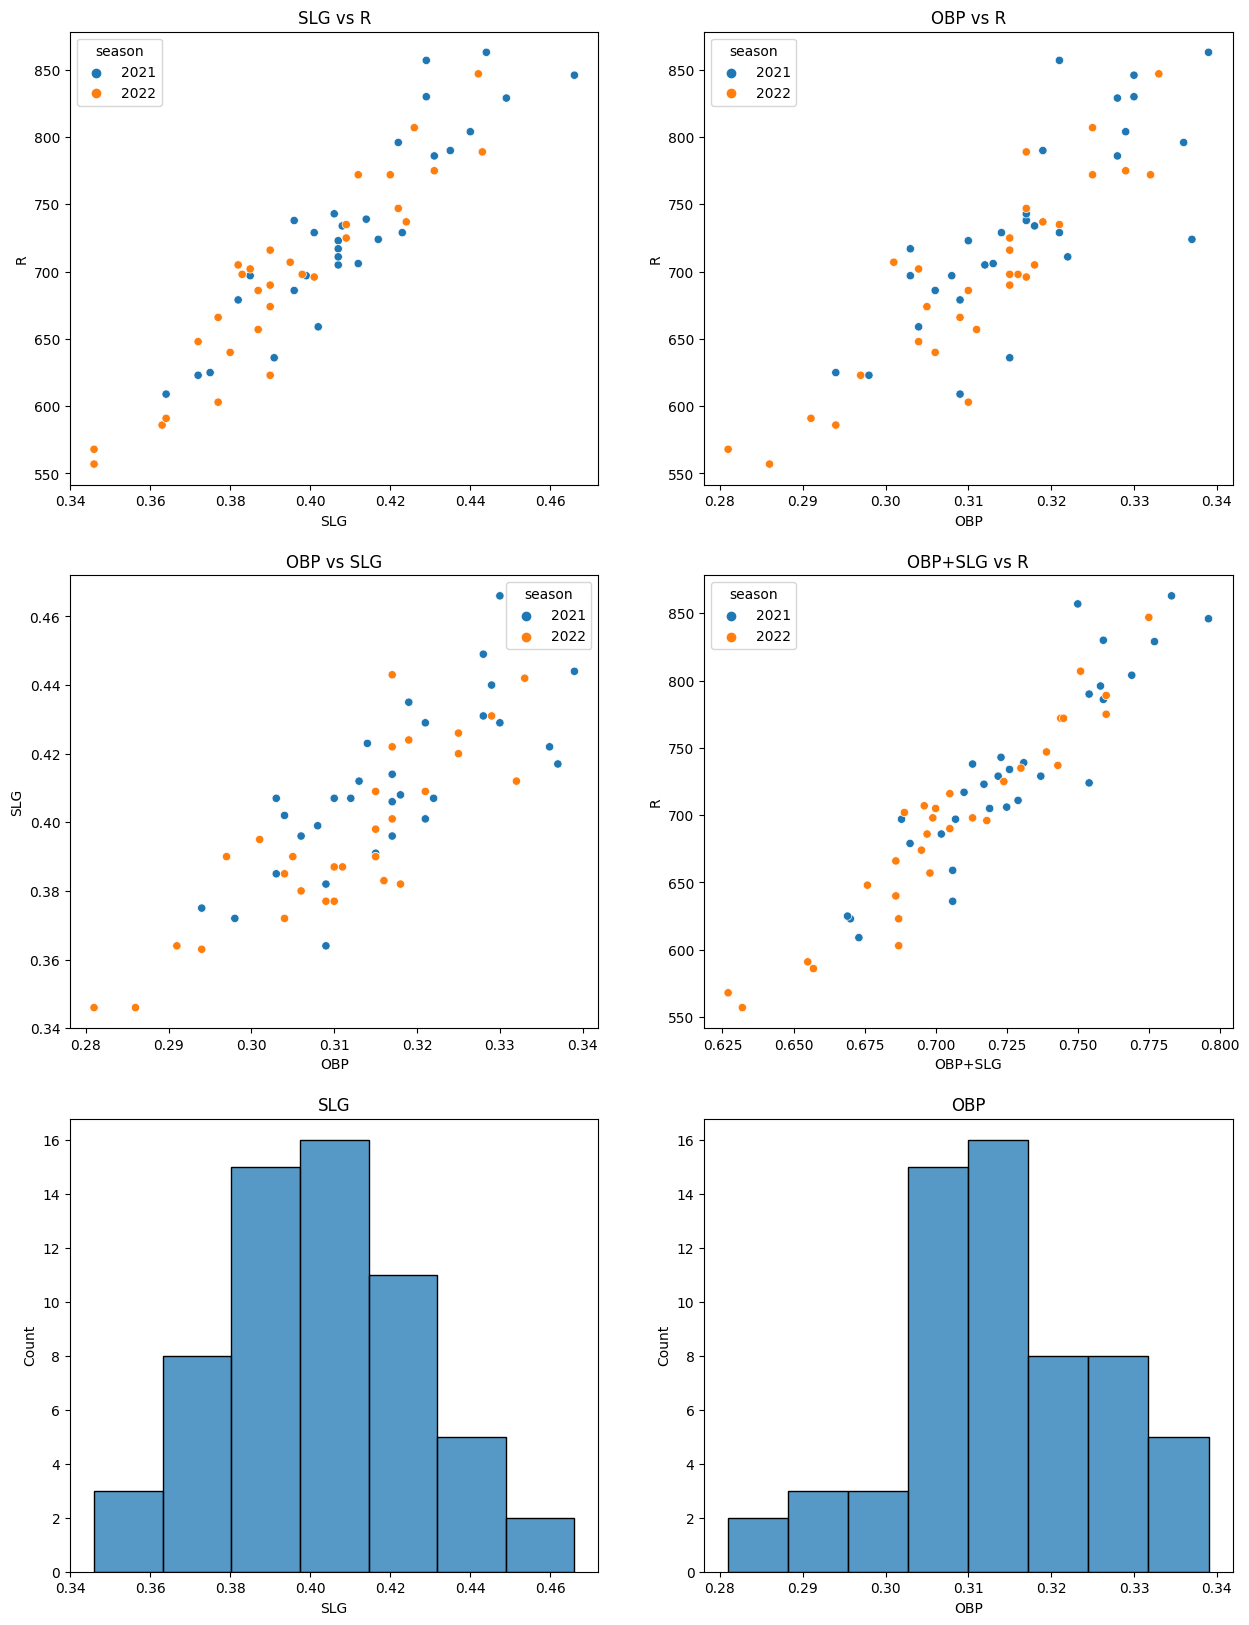

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

axes[0, 0].set_title('SLG vs R')
sns.scatterplot(ax=axes[0, 0], data=df, x='SLG', y='R', hue='season')

axes[0, 1].set_title('OBP vs R')
sns.scatterplot(ax=axes[0, 1], data=df, x='OBP', y='R', hue='season')

axes[1, 0].set_title('OBP vs SLG')
sns.scatterplot(ax=axes[1, 0], data=df, x='OBP', y='SLG', hue='season')

axes[1, 1].set_title('OBP+SLG vs R')
sns.scatterplot(ax=axes[1, 1], data=df, x='OBP+SLG', y='R', hue='season')

axes[2, 0].set_title('SLG')
sns.histplot(ax=axes[2, 0], data=df.SLG)

axes[2, 1].set_title('OBP')
sns.histplot(ax=axes[2, 1], data=df.OBP)

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     223.4
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.07e-27
Time:                        10:22:14   Log-Likelihood:                -276.92
No. Observations:                  60   AIC:                             559.8
Df Residuals:                      57   BIC:                             566.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -619.3205     87.111     -7.110      0.0

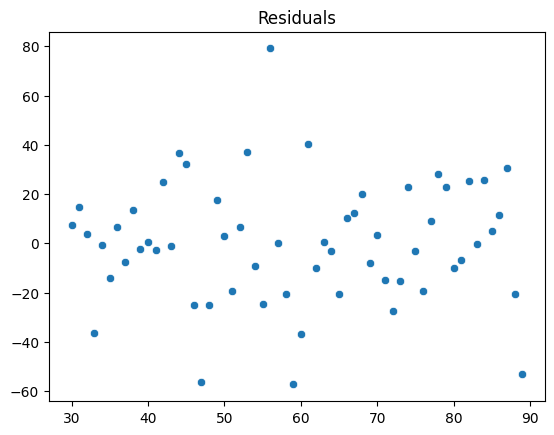

In [15]:
def setup_model(df, columns):
    y = df[target]
    X = sm.add_constant(df.loc[:, columns])

    return X, y

X, y = setup_model(df, regression_2_columns)

est = sm.OLS(y, X)
est = est.fit()

print_summary(est, X.columns)

#### Contributions for OBP+SLG

In [16]:
slg_param = est.params['SLG']
obp_param = est.params['OBP']

print(obp_param / slg_param)
print(slg_param / obp_param)

0.8569748764165469
1.166895351916867
